# Coupled Second Order ODEs

Consider the following double spring-mass system:

<img src="drawing.png" width="800">

Consider the following system of coupled second order ODEs:

$$\begin{equation}
m_1 \frac{d^2y_1}{dt^2} =  -k_1 y_1 + k_2 (y_2 - y_1)\\
m_2 \frac{d^2y_2}{dt^2} =  -k_2 (y_2 - y_1)
\end{equation}$$

where $y_1$ and $y_2$ are the displacements of two masses $m_1$ and $m_2$ from their equilibrium positions, and $k_1$ and $k_2$ are the spring constants of two springs.  The displacements are measured from the equilibrium positions, so that $y_1 = 0$ and $y_2 = 0$ are the equilibrium positions.  The displacements are measured in meters, the masses in kilograms, and the spring constants in N/m.

The system can be written in matrix form as

$$\begin{equation}
\begin{bmatrix}
\frac{d^2y_1}{dt^2}\\
\frac{d^2y_2}{dt^2}
\end{bmatrix}
=
\begin{bmatrix}
-\frac{(k_1+k_2)}{m_1} & \frac{k_2}{m_1}\\
\frac{k_2}{m_2} & -\frac{k_2}{m_2}
\end{bmatrix}
\begin{bmatrix}
y_1\\
y_2
\end{bmatrix}
\end{equation}$$

For the case where $m_1 = m_2 = 1$ kg, $k_1 = 3$ N/m, and $k_2 = 2$ N/m, the system can be written as

$$\begin{equation}
\begin{bmatrix}
\frac{d^2y_1}{dt^2}\\
\frac{d^2y_2}{dt^2}
\end{bmatrix}
=
\begin{bmatrix}
-5 & 2\\
2 & -2
\end{bmatrix}
\begin{bmatrix}
y_1\\
y_2
\end{bmatrix}
\end{equation}$$

From the fundamental theorem for eigenvalues and eigenvectors, we know that we can write:

$$\begin{bmatrix} \frac{d^2y_1}{dt^2}\\ \frac{d^2y_2}{dt^2} \end{bmatrix} = S \Lambda S^{-1} \begin{bmatrix} y_1\\ y_2 \end{bmatrix}$$


$$S^{-1} \begin{bmatrix} \frac{d^2y_1}{dt^2}\\ \frac{d^2y_2}{dt^2} \end{bmatrix} = \Lambda S^{-1} \begin{bmatrix} y_1\\ y_2 \end{bmatrix}$$

We can define a new set of variables, $r$ and $s$, as:

$$\begin{equation}

\begin{bmatrix} r_1\\ r_2 \end{bmatrix} = S^{-1} \begin{bmatrix} y_1\\ y_2 \end{bmatrix}

\end{equation}$$

Then, the system of ODEs can be written as

$$\begin{equation}

\begin{bmatrix} \frac{d^2r_1}{dt^2}\\ \frac{d^2r_2}{dt^2} \end{bmatrix} = \Lambda \begin{bmatrix} r_1\\ r_2 \end{bmatrix}

\end{equation}$$

where $\Lambda$ is a diagonal matrix with the eigenvalues of the coefficient matrix on the diagonal.

 

In [14]:
import numpy as np

m1 = 1 # kg
m2 = 1 # kg
k1 = 3 # N/m
k2 = 2 # N/m

# Initial conditions

y10 = 1
y20 = 2
y10dot = -2*np.sqrt(6)
y20dot = np.sqrt(6)

# create a coefficient matrix
A = np.array([[-(k1+k2)/m1, k2/m1], [k2/m2, -k2/m2]])
print(A)

# print the eigenvalues and eigenvectors of the coefficient matrix
eigenvalues, eigenvectorsT = np.linalg.eig(A)

# the eigenvectors are the columns of the eigenvectorsT matrix
# taking the transpose of this matrix gives the eigenvectors as rows
eigenvectors = eigenvectorsT.T
print('The eigenvalues are ')
print(eigenvalues)
print('The eigenvectors (columns) are ')
print(eigenvectorsT)
print()

[[-5.  2.]
 [ 2. -2.]]
The eigenvalues are 
[-6. -1.]
The eigenvectors (columns) are 
[[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


## Solution of the System of ODEs

Solving for the eigenvalues and eigenvectors of the coefficient matrix, we find that the eigenvalues are $\lambda_1 = -6$ and $\lambda_2 = -1$.  

The corresponding eigenvectors are $\mathbf{v}_1 = \begin{bmatrix}\frac{2}{\sqrt{5}}\\-\frac{1}{\sqrt{5}}\end{bmatrix}$ and $\mathbf{r}_2 = \begin{bmatrix}\frac{1}{\sqrt{5}}\\\frac{2}{\sqrt{5}}\end{bmatrix}$.

From these, we create a similar matrix $S$ with the eigenvectors as columns, and a diagonal matrix $L$ with the eigenvalues on the diagonal:

$$\begin{equation}
S = \begin{bmatrix}
\frac{2}{\sqrt{5}} & \frac{1}{\sqrt{5}}\\
-\frac{1}{\sqrt{5}} & \frac{2}{\sqrt{5}}
\end{bmatrix}
\end{equation}$$

$$\begin{equation}
L = \begin{bmatrix}
-6 & 0\\
0 & -1
\end{bmatrix}
\end{equation}$$

The solution of the system of ODEs is then

$$\begin{equation}
\begin{bmatrix}
y_1\\
y_2
\end{bmatrix}
=
\begin{bmatrix}
\frac{2}{\sqrt{5}} & \frac{1}{\sqrt{5}}\\
-\frac{1}{\sqrt{5}} & \frac{2}{\sqrt{5}}
\end{bmatrix}
\begin{bmatrix}
r_1\\
r_2
\end{bmatrix}
\end{equation}$$

where $r_1$ and $r_2$ are the solutions of the system of ODEs

$$\begin{equation}
\begin{bmatrix}
\frac{d^2r_1}{dt^2}\\
\frac{d^2r_2}{dt^2}
\end{bmatrix}
=
\begin{bmatrix}
-6 & 0\\
0 & -1
\end{bmatrix}
\begin{bmatrix}
r_1\\
r_2
\end{bmatrix}
\end{equation}$$

The solution of this system of ODEs is
    
$$\begin{equation}
\begin{bmatrix}
r_1\\
r_2
\end{bmatrix}
=
\begin{bmatrix}
c_1 sin(\sqrt{6}t) + c_2 cos(\sqrt{6}t)\\
k_1 sin(t) + k_2 cos(t)
\end{bmatrix}
\end{equation}$$

where $c_1$, $c_2$, $k_1$, and $k_2$ are constants of integration.

We can determine these constants of integration from the initial conditions.  If the initial conditions are $y_1(0) = 1$ m, $y_2(0) = 2$ m, $y_1'(0) = -2\sqrt{6}$ m/s, and $y_2'(0) = \sqrt{6}$ m/s, then the solution of the system of ODEs is

$$\begin{equation}
\begin{bmatrix}
y_1\\
y_2
\end{bmatrix}
=
\begin{bmatrix}
\frac{2}{\sqrt{5}} & \frac{1}{\sqrt{5}}\\
-\frac{1}{\sqrt{5}} & \frac{2}{\sqrt{5}}
\end{bmatrix}
\begin{bmatrix}
c_1 sin(\sqrt{6}t) + c_2 cos(\sqrt{6}t)\\
k_1 sin(t) + k_2 cos(t)
\end{bmatrix}
\end{equation}$$

where

$$\begin{equation}
\begin{bmatrix}
c_2\\
k_2
\end{bmatrix}
=
\begin{bmatrix}
\frac{2}{\sqrt{5}} & \frac{1}{\sqrt{5}}\\
-\frac{1}{\sqrt{5}} & \frac{2}{\sqrt{5}}
\end{bmatrix}^{-1}
\begin{bmatrix}
1\\
2
\end{bmatrix}
\end{equation}$$

$$\begin{equation}
\begin{bmatrix}
c_2\\
k_2
\end{bmatrix}
=
\begin{bmatrix}
\frac{2}{\sqrt{5}} & -\frac{1}{\sqrt{5}}\\
\frac{1}{\sqrt{5}} & \frac{2}{\sqrt{5}}
\end{bmatrix}
\begin{bmatrix}
1\\
2
\end{bmatrix}
\end{equation}$$

$$\begin{equation}
\begin{bmatrix}
c_2\\
k_2
\end{bmatrix}
=
\begin{bmatrix}
0\\
\sqrt{5}
\end{bmatrix}
\end{equation}$$

and

$$\begin{equation}
\begin{bmatrix}
\sqrt{6} c_1\\
k_1
\end{bmatrix}
=
\begin{bmatrix}
\frac{2}{\sqrt{5}} & \frac{1}{\sqrt{5}}\\
-\frac{1}{\sqrt{5}} & \frac{2}{\sqrt{5}}
\end{bmatrix}^{-1}
\begin{bmatrix}
-2\sqrt{6}\\
\sqrt{6}
\end{bmatrix}
\end{equation}$$

$$\begin{equation}
\begin{bmatrix}
\sqrt{6} c_1\\
k_1
\end{bmatrix}
=
\begin{bmatrix}
\frac{2}{\sqrt{5}} & -\frac{1}{\sqrt{5}}\\
\frac{1}{\sqrt{5}} & \frac{2}{\sqrt{5}}
\end{bmatrix}
\begin{bmatrix}
-2\sqrt{6}\\
\sqrt{6}
\end{bmatrix}
\end{equation}$$

$$\begin{equation}
\begin{bmatrix}
\sqrt{6} c_1\\
k_1
\end{bmatrix}
=
\begin{bmatrix}
-\sqrt{5} \sqrt{6}\\
0
\end{bmatrix}
\end{equation}$$

From these, we can determine the constants of integration, to be:

$$c1 = -\sqrt{5}$$
$$c2 = 0$$
$$k1 = 0$$
$$k2 = \sqrt{5}$$

Thus, the solution of the system of ODEs is

$$\begin{equation}
\begin{bmatrix}
y_1\\
y_2
\end{bmatrix}
=
\begin{bmatrix}
\frac{2}{\sqrt{5}} & \frac{1}{\sqrt{5}}\\
-\frac{1}{\sqrt{5}} & \frac{2}{\sqrt{5}}
\end{bmatrix}
\begin{bmatrix}
-\sqrt{5} sin(\sqrt{6}t)\\
\sqrt{5} cos(t)
\end{bmatrix}
\end{equation}$$

$$\begin{equation}
\begin{bmatrix}
y_1\\
y_2
\end{bmatrix}
=
\begin{bmatrix}
-2 sin(\sqrt{6}t) + cos(t)\\
sin(\sqrt{6}t) + 2cos(t)
\end{bmatrix}
\end{equation}$$



In [23]:
import sympy as sym

# create a solution matrix
R = sym.Matrix([sym.symbols('r1'), sym.symbols('r2')])
sym.pretty_print(R)

# create a matrix of eigenvectors
S = sym.Matrix(eigenvectorsT)
sym.pretty_print(S)

# create a diagonal matrix of eigenvalues
L = sym.Matrix([[eigenvalues[0], 0], [0, eigenvalues[1]]])

# create the inverse of the matrix of eigenvectors
Sinv = S.inv()
sym.pretty_print(Sinv)

if (eigenvalues[0] > 0 ):
    r1 = sym.symbols('c1')*sym.exp(sym.sqrt(eigenvalues[0]) * sym.symbols('t')) + sym.symbols('c2')*sym.exp(-sym.sqrt(eigenvalues[0]) * sym.symbols('t'))
else:
    r1 = sym.symbols('c1') * sym.sin(sym.sqrt(-eigenvalues[0]) * sym.symbols('t')) + sym.symbols('c2') * sym.cos(sym.sqrt(-eigenvalues[0]) * sym.symbols('t'))

if (eigenvalues[1] > 0 ):
    r2 = sym.symbols('k1')*sym.exp(sym.sqrt(eigenvalues[1]) * sym.symbols('t')) + sym.symbols('k2')*sym.exp(-sym.sqrt(eigenvalues[1]) * sym.symbols('t'))
else:
    r2 = sym.symbols('k1') * sym.sin(sym.sqrt(-eigenvalues[1]) * sym.symbols('t')) + sym.symbols('k2') * sym.cos(sym.sqrt(-eigenvalues[1]) * sym.symbols('t'))

sym.pretty_print(r1)
sym.pretty_print(r2)

Y = S * R

print('The solution is')
sym.pretty_print(Y)

print('r1(0) = ',r1.subs(sym.symbols('t'),0).subs(sym.symbols('t'),0))
print('r2(0) = ',r2.subs(sym.symbols('t'),0).subs(sym.symbols('t'),0))

print('r1dot(0) = ',sym.diff(r1,sym.symbols('t')).subs(sym.symbols('t'),0))
print('r2dot(0) = ',sym.diff(r2,sym.symbols('t')).subs(sym.symbols('t'),0))




⎡r₁⎤
⎢  ⎥
⎣r₂⎦
⎡-0.894427190999916  -0.447213595499958⎤
⎢                                      ⎥
⎣0.447213595499958   -0.894427190999916⎦
⎡-0.894427190999916  0.447213595499958 ⎤
⎢                                      ⎥
⎣-0.447213595499958  -0.894427190999916⎦
c₁⋅sin(2.44948974278318⋅t) + c₂⋅cos(2.44948974278318⋅t)
k₁⋅sin(1.0⋅t) + k₂⋅cos(1.0⋅t)
The solution is
⎡-0.894427190999916⋅r₁ - 0.447213595499958⋅r₂⎤
⎢                                            ⎥
⎣0.447213595499958⋅r₁ - 0.894427190999916⋅r₂ ⎦
r1(0) =  c2
r2(0) =  k2
r1dot(0) =  2.44948974278318*c1
r2dot(0) =  1.0*k1


In [24]:
Y0 = S * R.subs(sym.symbols('r1'),r1).subs(sym.symbols('r2'),r2)
Y0 = Y0.subs(sym.symbols('t'),0)
sym.pretty_print(Y0)

Y0dot = S * R.subs(sym.symbols('r1'),sym.diff(r1,sym.symbols('t'))).subs(sym.symbols('r2'),sym.diff(r2,sym.symbols('t')))
Y0dot = Y0dot.subs(sym.symbols('t'),0)
sym.pretty_print(Y0dot)

Y0val = sym.Matrix([sym.symbols('y10'), sym.symbols('y20')])
sym.pretty_print(Y0val)

Y0dotval = sym.Matrix([sym.symbols('y10dot'), sym.symbols('y20dot')])
sym.pretty_print(Y0dotval)

Y0val = Y0val.subs(sym.symbols('y10'),y10).subs(sym.symbols('y20'),y20)
Y0dotval = Y0dotval.subs(sym.symbols('y10dot'),y10dot).subs(sym.symbols('y20dot'),y20dot)

sym.pretty_print(Y0val)
sym.pretty_print(Y0dotval)

⎡-0.894427190999916⋅c₂ - 0.447213595499958⋅k₂⎤
⎢                                            ⎥
⎣0.447213595499958⋅c₂ - 0.894427190999916⋅k₂ ⎦
⎡-2.19089023002066⋅c₁ - 0.447213595499958⋅k₁⎤
⎢                                           ⎥
⎣1.09544511501033⋅c₁ - 0.894427190999916⋅k₁ ⎦
⎡y₁₀⎤
⎢   ⎥
⎣y₂₀⎦
⎡y1̇0⎤
⎢   ⎥
⎣y2̇0⎦
⎡1⎤
⎢ ⎥
⎣2⎦
⎡-4.89897948556636⎤
⎢                 ⎥
⎣2.44948974278318 ⎦


In [25]:
constant_dict = sym.solve([Y0val[0] - Y0[0], Y0val[1] - Y0[1], Y0dotval[0] - Y0dot[0], Y0dotval[1] - Y0dot[1]], [sym.symbols('c1'), sym.symbols('c2'), sym.symbols('k1'), sym.symbols('k2')])

In [26]:
print(constant_dict[sym.symbols('c1')])
print(constant_dict[sym.symbols('c2')])
print(constant_dict[sym.symbols('k1')])
print(constant_dict[sym.symbols('k2')])


2.23606797749980
0.0
0.0
-2.23606797749979


In [27]:
Y_solution = Y.subs(sym.symbols('r1'),r1).subs(sym.symbols('r2'),r2)
Y_solution = Y_solution.subs(sym.symbols('c1'),constant_dict[sym.symbols('c1')]).subs(sym.symbols('c2'),constant_dict[sym.symbols('c2')]).subs(sym.symbols('k1'),constant_dict[sym.symbols('k1')]).subs(sym.symbols('k2'),constant_dict[sym.symbols('k2')])
Y_solution = Y_solution.subs(sym.symbols('r1'),r1).subs(sym.symbols('r2'),r2)
sym.pretty_print(Y_solution)

⎡-2.00000000000001⋅sin(2.44948974278318⋅t) + 1.0⋅cos(1.0⋅t)⎤
⎢                                                          ⎥
⎣       1.0⋅sin(2.44948974278318⋅t) + 2.0⋅cos(1.0⋅t)       ⎦


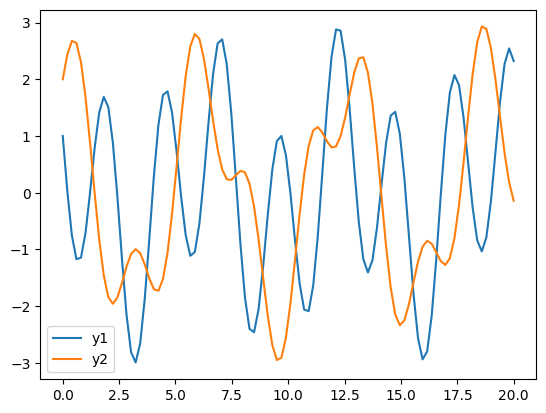

In [28]:
import matplotlib.pyplot as plt

t = np.linspace(0, 20, 100)

y1t = sym.lambdify(sym.symbols('t'), Y_solution[0], 'numpy')
y2t = sym.lambdify(sym.symbols('t'), Y_solution[1], 'numpy')

plt.plot(t, y1t(t), label='y1')
plt.plot(t, y2t(t), label='y2')
plt.legend()
plt.show()

In [29]:
# now, let's calculate the motion numerically, using the Euler method
# time step
dt = 0.001

# number of time steps
n = 20000

# create arrays to store the solution
tn = np.zeros(n)
y1 = np.zeros(n)
y2 = np.zeros(n)
y1dot = np.zeros(n)
y2dot = np.zeros(n)

# initial conditions
tn[0] = 0
y1[0] = 1
y2[0] = 2
y1dot[0] = -2*np.sqrt(6)
y2dot[0] = np.sqrt(6)

# loop over time steps
for i in range(n-1):
    # calculate the derivatives
    y1dotdot = -(k1+k2)/m1 * y1[i] + k2/m1 * y2[i]
    y2dotdot = k2/m2 * (y1[i] - y2[i])
    
    # calculate the new values of y1 and y2 (Euler method)
    y1[i+1] = y1[i] + y1dot[i] * dt
    y2[i+1] = y2[i] + y2dot[i] * dt
    
    # calculate the new values of y1 and y2 (Euler-Cromer method)
    # y1[i+1] = y1[i] + y1dot[i] * dt + 0.5 * y1dotdot * dt**2
    # y2[i+1] = y2[i] + y2dot[i] * dt + 0.5 * y2dotdot * dt**2
    
    # calculate the new values of y1dot and y2dot
    y1dot[i+1] = y1dot[i] + y1dotdot * dt
    y2dot[i+1] = y2dot[i] + y2dotdot * dt
    
    # calculate the new time
    tn[i+1] = tn[i] + dt

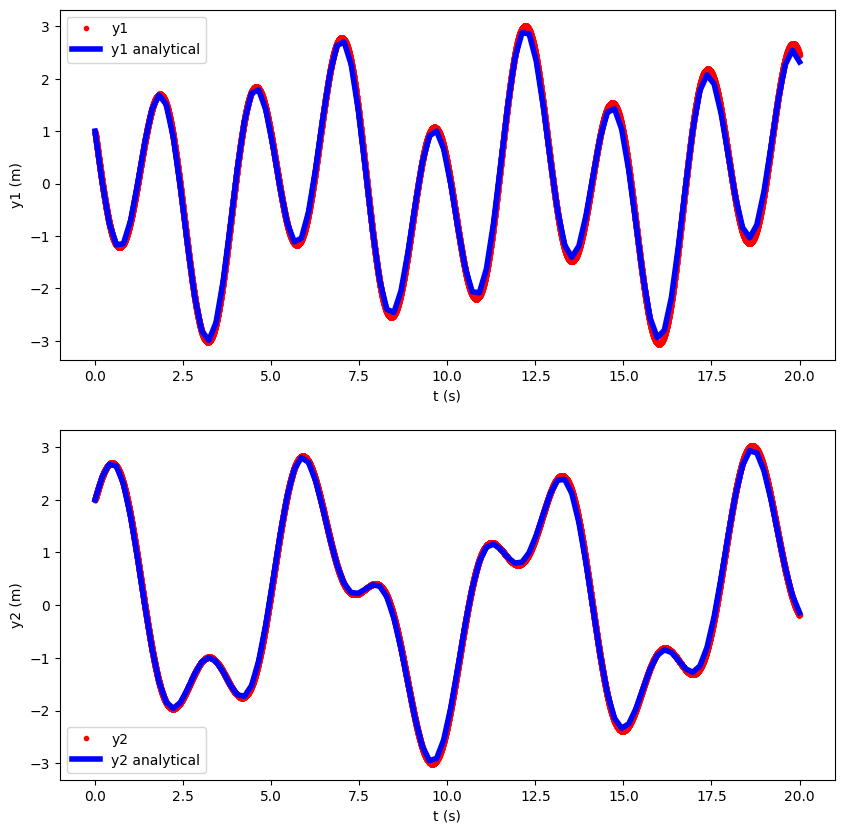

In [30]:
# plot the results
fig, ax = plt.subplots(2,figsize=(10, 10))
ax[0].plot(tn, y1, 'r.', label='y1')
ax[1].plot(tn, y2, 'r.', label='y2')
ax[0].plot(t, y1t(t), 'b-', label='y1 analytical', linewidth=4)
ax[1].plot(t, y2t(t), 'b-', label='y2 analytical', linewidth=4)
ax[0].set_xlabel('t (s)')
ax[1].set_xlabel('t (s)')
ax[0].set_ylabel('y1 (m)')
ax[1].set_ylabel('y2 (m)')
ax[0].legend()
ax[1].legend()
plt.show()
